# Подбор параметров и ROC кривая

Загрузим ранее подготовленные данные датасета "Титаник"

In [1]:
import pandas as pd

titanic_data = pd.read_csv('./data/titanic/train.csv')
titanic_data.head()

X = pd.read_pickle('./data/titanic/train_x.pkl')
y = pd.read_pickle('./data/titanic/train_y.pkl')

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [3]:
import sklearn.tree as tree

clf = tree.DecisionTreeClassifier()

In [4]:
params = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

Опробуем наши параметры и найдем оптимальные для модели. Для этого воспользуемся классом GridSearchCV библиотеки sklearn.

In [5]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(estimator=clf, param_grid=params, cv=5)

gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

Выведем параметры модели, для которых метрика accuracy (параметр по умолчанию для GridSearchCV) будет максимальной

In [6]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 6}

Вычислим точность на тестовых данных

In [7]:
best_clf = gs.best_estimator_

best_clf.score(X_test, y_test)

0.7694915254237288

Рассчитаем метрики precision и recall для получившегося классификатора

In [8]:
from sklearn.metrics import precision_score, recall_score

y_pred = best_clf.predict(X_test)
print('precision_score:', precision_score(y_test, y_pred))
print('recall_score:', recall_score(y_test, y_pred))

precision_score: 0.8023255813953488
recall_score: 0.575


Выведем вероятность предсказаниий

In [9]:
y_predicted_prob = best_clf.predict_proba(X_test)
print(y_predicted_prob[0:5])

[[0.88518519 0.11481481]
 [0.88518519 0.11481481]
 [0.88518519 0.11481481]
 [0.         1.        ]
 [0.65625    0.34375   ]]


Построим гистограмму вероятностей отнесения к положительному классу

<AxesSubplot:>

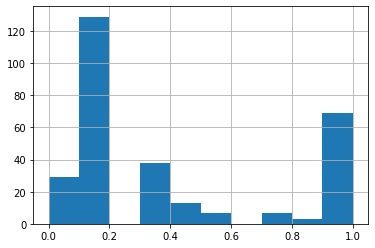

In [10]:
pd.Series(y_predicted_prob[:, 1]).hist()

Отнесём всех пассажиров с вероятностью выживания 0.8 к выжившим

In [12]:
import numpy as np

y_pred = np.where(y_predicted_prob[:, 1] > 0.8, 1, 0)

Расчитаем метрики

In [14]:
print('precision_score:', precision_score(y_test, y_pred))
print('recall_score:', recall_score(y_test, y_pred))

precision_score: 0.8611111111111112
recall_score: 0.5166666666666667


## ROC - кривая рабочей характеристики приемника
Позволяет лучше подобрать порог принятия решения для классификатора

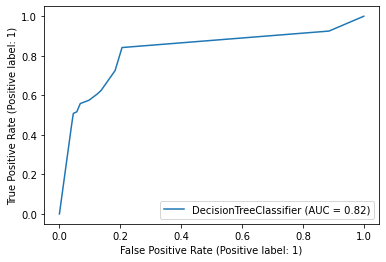

In [15]:
from sklearn import metrics

metrics.plot_roc_curve(best_clf, X_test, y_test)